# HarvestStat Data Profiling - Kenya

In [1]:
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import geopandas as gpd
from tools import retreive_fdw_data, save_npz, PrintAdminUnits, PlotAdminShapes
from tools import FDW_PD_Sweeper, FDW_PD_AvalTable, FDW_PD_Compiling, FDW_PD_ValidateFnidName
from tools import FDW_PD_CreateAdminLink, FDW_PD_RatioAdminLink, FDW_PD_ConnectAdminLink
from tools import product_name_mapping, FDW_PD_CaliSeasonYear, FDW_PD_MergeCropProductionSystem
from tools_graphic import PlotBarProduction, PlotLinePAY
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

In [2]:
# Set loading parameters ------------------------ #
country_name = 'Kenya'
country_iso2 = 'KE'
use_api_data = False
requires_authentication = True
# ----------------------------------------------- #

# Load FEWS NET administrative boundaries ------- #
epsg = 'epsg:32630' # Burkina Faso
fn_shapes = sorted(glob.glob(f"../data/shapefile/fewsnet/{country_iso2}_Admin?_????.shp"))
shape_all = []
for fn in fn_shapes:
    name = fn[-18:-4]
    exec('%s = gpd.read_file("%s").to_crs("%s")' % (name, fn, epsg))
    exec('%s["area"] = %s["geometry"].area/10**6' % (name, name))
    exec('shape_all.append(%s)' % (name))
shape_all = pd.concat(shape_all, axis=0).reset_index(drop=True)
# PrintAdminUnits(shape_all)
# ----------------------------------------------- #

# Load FDW data -------------------------------- #
df = retreive_fdw_data(country_name, country_iso2, use_api_data, requires_authentication)
# ----------------------------------------------- #

Data is loaded from the local file.
../data/crop_raw_data/adm_crop_data_raw_KE.csv is loaded.


In [3]:
# Manual Pre-processing before Sweeping --------- #
# 1. Default setting 
# a) None-type crop production system
df.loc[df['crop_production_system'].isna(), 'crop_production_system'] = 'none'
df.loc[df['crop_production_system'] == '', 'crop_production_system'] = 'none'
# b) None-type population group
df.loc[df['population_group'].isna(), 'population_group'] = 'none'
df.loc[df['population_group'] == '', 'population_group'] = 'none'
# ----------------------------------------------- #

# FDW Production Data Inspection ---------------- #
df, df_raw = FDW_PD_Sweeper(df, area_priority='Area Planted')
table_dict = FDW_PD_AvalTable(df, shape_all)
# ----------------------------------------------- #

# FEWS NET Shapefile comparison ----------------- #
shape_used = pd.concat([KE_Admin2_1982, KE_Admin2_1989, KE_Admin1_2013], axis=0)
PlotAdminShapes(shape_used, label=True)
# ----------------------------------------------- #

- Remove missing records ---------------------- #
Orignial data points: 51,595
Removed 5,350 "Missing Value" points
15,653/17,416 "Area Harvested" points are retained.
15,370/17,164 "Quantity Produced" points are retained.
15,202/16,995 "Yield" points are retained.
20/20 "Area Planted" points are retained.


Current data points: 46,245



- Minor changes are applied ------------------- #

- Basic information --------------------------- #


Data period: 1966 - 2024
45 grain types are found: Amaranth, Arrowroot, Bambara groundnut, Banana (unspecified), Barley (Unspecified), Beans (mixed), Black nightshade, Cabbage (Unspecified), Canola seed, Carrots, Cashew (unshelled), Cassava, Coconut (in shell), Coffee (unspecified), Coriander, Cotton (Unspecified), Cowpea (unspecified), Groundnuts (In Shell), Jute, Kale, Macadamia (unspecified), Maize Grain (Fresh), Maize Grain (White), Millet, Mung bean (unspecified), Onions, Pea (unspecified), Pigeon pea (Unspecified), Pineapple (unspecified), Potato (Irish), Pyrethrum, Rice (Paddy), Scallion, Sesame Seed, Sorghum, Sugarcane (for sugar), Sunflower Seed, Sweet Potatoes, Taro/Cocoyam (Unspecified), Tea leaves (Mixed), Tobacco (unspecified), Tomato, Watermelon, Wheat Grain, Yams
3 seasons are found: Annual harvest (01-01), Long rains harvest (03-01), Short rains harvest (10-01)
1 crop production system are found: All (PS)
Data sources include:
[1] AFA, Kenya --- Alt_AFA_Official agricul

- Recorded years per season ------------------- #
Annual harvest: 58 years (1966-2023) (missing: 0 years)
Long rains harvest: 34 years (1991-2024) (missing: 13 years)
Short rains harvest: 34 years (1990-2023) (missing: 14 years)

- Number of "Quantity Produced" data points --- #
KE1982A2: 2,513 data points are found.
KE1989A2: 2,894 data points are found.
KE2007A2: 183 data points are found.
KE2009A2: 1,150 data points are found.
KE2013A1: 8,630 data points are found.

- Districts with population group(s) ---------- #
0 districts includes 'population_group'.

Table of available data


----------------------------------------------- #
Crop type: Amaranth
----------------------------------------------- #
season_name            Annual harvest       
crop_production_system       All (PS)       
fnid_short                     2009A2 2013A1
year                                        
2009                             2/47    NaN
2010                              NaN    NaN
2011                              NaN    NaN
2012                             7/47    NaN
2013                              NaN   7/47
2014                              NaN   7/47
2015                              NaN  15/47
2016                              NaN  15/47
2017                              NaN  17/47
2018                              NaN  16/47
2019                              NaN  16/47
----------------------------------------------- #
Crop type: Arrowroot
----------------------------------------------- #
season_name            Annual harvest              
crop_production_system       All

../figures/KE_admin_shapes.png is saved.


In [4]:
pd.options.display.max_columns=100
rows = ['fnid','crop_production_system','season_year', 'product','indicator']
df.loc[(df[rows].duplicated(keep=False)),'product'].unique()

array([], dtype=object)

- Kenya crop seasonal calendar

<img src="https://fews.net/sites/default/files/styles/large_width_880/public/2023-03/seasonal-calendar-kenya.png?itok=0Wob_hCK" width=900>

- FDW data consists of `KE1982A1`, `KE1982A2`, `KE1989A1`, `KE1989A2`, `KE2013A1`.

| Year | Admin-1 | # units  | Admin-2  | # units |
| :---: | :----:  | :----:   | :----:   | :---:  |
| 1982 | **`KE1982A1`**| 8  | **`KE1982A2`** | 41|
| 1989 | **`KE1989A1`**| 8  | **`KE1989A2`** | 47|
| 2009 | KE2009A1| 8        | KE2009A2 | 47      |
| 2013 | **`KE2013A1`**| 47 | KE2013A2 | 290     |

- Comparison between admin boundaries.

<img src="../figures/KE_admin_shapes.png" width=900>

- In 1989, 6 districts are divided and added.

| 1982-1989 (original) |1989-2013 (changed)|1989-2013 (added)|
| :---:| :---:|:---:|
|Meru (KE1982A25020)    | Meru (KE1989A25017)    | Tharaka Nithi (KE1989A25018)|
|Machakos (KE1982A25019)| Machakos(KE1989A25004) | Makueni       (KE1989A25005)|
|Kericho  (KE1982A25424)| Kericho  (KE1989A25422)| Bomet         (KE1989A25420)|
|Kissi    (KE1982A25319)| Kissi    (KE1989A25314)| Nyamira       (KE1989A25308)|
|Homa Bay (KE1982A25318)| Homa Bay (KE1989A25313)| Migori        (KE1989A25316)|
|Kakamega (KE1982A25512)| Kakamega (KE1989A25511)| Vihiga        (KE1989A25508)|

- In 2013, Admin-2 became Admin-1 (no name changes).
- **`KE2013A1`** is used to represent all admin-level 1 crop data.
- Kenya has three crop seasons: `Annual harvest`, `Long rains harvest`, `Short rains harvest`.
- Kenya has a single crop production system: `None`.

In [5]:
# Define the latest shapefile ------------------- #
latest_level = 1
shape_latest = KE_Admin1_2013.copy().to_crs('epsg:4326')
# ----------------------------------------------- #

# Validation of FNIDs and Names ----------------- #
df = FDW_PD_ValidateFnidName(df, shape_used, shape_latest)
df['season_name'] = df['season_name'].replace({'Annual harvest':'Annual', 'Long rains harvest':'Long', 'Short rains harvest':'Short'})
# ----------------------------------------------- #

# FDW Production Data Compiling ----------------- #
area, prod = FDW_PD_Compiling(df, shape_used)
area_all, prod_all = area.copy(), prod.copy()
mdx_pss = area.columns.droplevel([0,1]).unique()
# ----------------------------------------------- #

KE1982A25318:	"South Nyanza" (FDW) is changed to "Homa Bay" (shapefile).


In [6]:
# Link admin boundaries ------------------------- #
link_1982, over_1982 = FDW_PD_CreateAdminLink(KE_Admin2_1982, KE_Admin1_2013, 'ADMIN2', 'ADMIN1', prod, epsg)
assert all(np.unique([v['method'] for k,v in link_1982.items()]) == 'PBR')
link_1989, over_1989 = FDW_PD_CreateAdminLink(KE_Admin2_1989, KE_Admin1_2013, 'ADMIN2', 'ADMIN1', prod, epsg)
assert all(np.unique([v['method'] for k,v in link_1989.items()]) == 'PBR')
# Crop specific ratios
link_ratio_1982 = FDW_PD_RatioAdminLink(link_1982, prod, over_1982, mdx_pss)
link_ratio_1989 = FDW_PD_RatioAdminLink(link_1989, prod, over_1989, mdx_pss)
# Merge link_ratio
assert link_ratio_1982.keys() == link_ratio_1989.keys()
link_merged = [link_ratio_1982, link_ratio_1989]
fnids_new = list(link_merged[0].keys())
link_ratio = dict()
for fnid in fnids_new:
    container = []
    for link in link_merged:
        container.append(link[fnid])
    link_ratio[fnid] = pd.concat(container, axis=1)
# Add current unit to link_ratio
for fnid_new in link_ratio.keys():
    link_ratio[fnid_new][fnid_new] = 1.0
    link_ratio[fnid_new] = link_ratio[fnid_new].sort_index(axis=1, ascending=False)
# Connect data with AdminLink
area_new, prod_new = FDW_PD_ConnectAdminLink(link_ratio, area, prod, validation=False)
# ----------------------------------------------- #

In [7]:
# Manual correction ----------------------------- #
crop_new = prod_new/area_new
# - Remove "Short" season yield over 4 mt/ha
rdx = crop_new.loc[:,pd.IndexSlice[:,:,'Maize Grain (White)','Short']] > 4
crop_new[rdx] = np.nan
# prod_new[rdx] = np.nan
# ----------------------------------------------- #

# Complete long format DataFrame ---------------- #
df_area = area_new.T.stack().rename('value').reset_index()
df_area['indicator'] = 'area'
df_prod = prod_new.T.stack().rename('value').reset_index()
df_prod['indicator'] = 'production'
df_yield = crop_new.T.stack().rename('value').reset_index()
df_yield['indicator'] = 'yield'
stack = pd.concat([df_area, df_prod, df_yield], axis=0)
# Add "planting year"
cols = ['season_name','product','crop_production_system','planting_month','harvest_year','harvest_month','planting_year']
season_table = df[cols].drop_duplicates()
stack = stack.merge(season_table, on=cols[:-1])
# Add country and admin names
stack = stack.merge(df[['fnid','country','country_code','admin_1','admin_2']].drop_duplicates(), on='fnid', how='inner')
names = [
    'fnid','country','country_code','admin_1','admin_2','name',
    'product','season_name','planting_year','planting_month','harvest_year','harvest_month',
    'crop_production_system','indicator','value'
]
stack = stack[names]
# ----------------------------------------------- #

# Final Processing ------------------------------ #
# Product name mapping
stack = product_name_mapping(stack, list_except=None)
# Calibration of crop calendar using External Season Calendar (ESC)
esc = pd.read_csv('../data/crop_calendar/external_season_calendar.csv')
stack, link_ratio = FDW_PD_CaliSeasonYear(stack, esc, link_ratio=None)
# None admin names
stack.loc[stack['admin_1'].isna(), 'admin_1'] = 'none'
stack.loc[stack['admin_2'].isna(), 'admin_2'] = 'none'
# ----------------------------------------------- #

All [country, season_name] are in the external season calendar.


# Postprocessing outlier removal

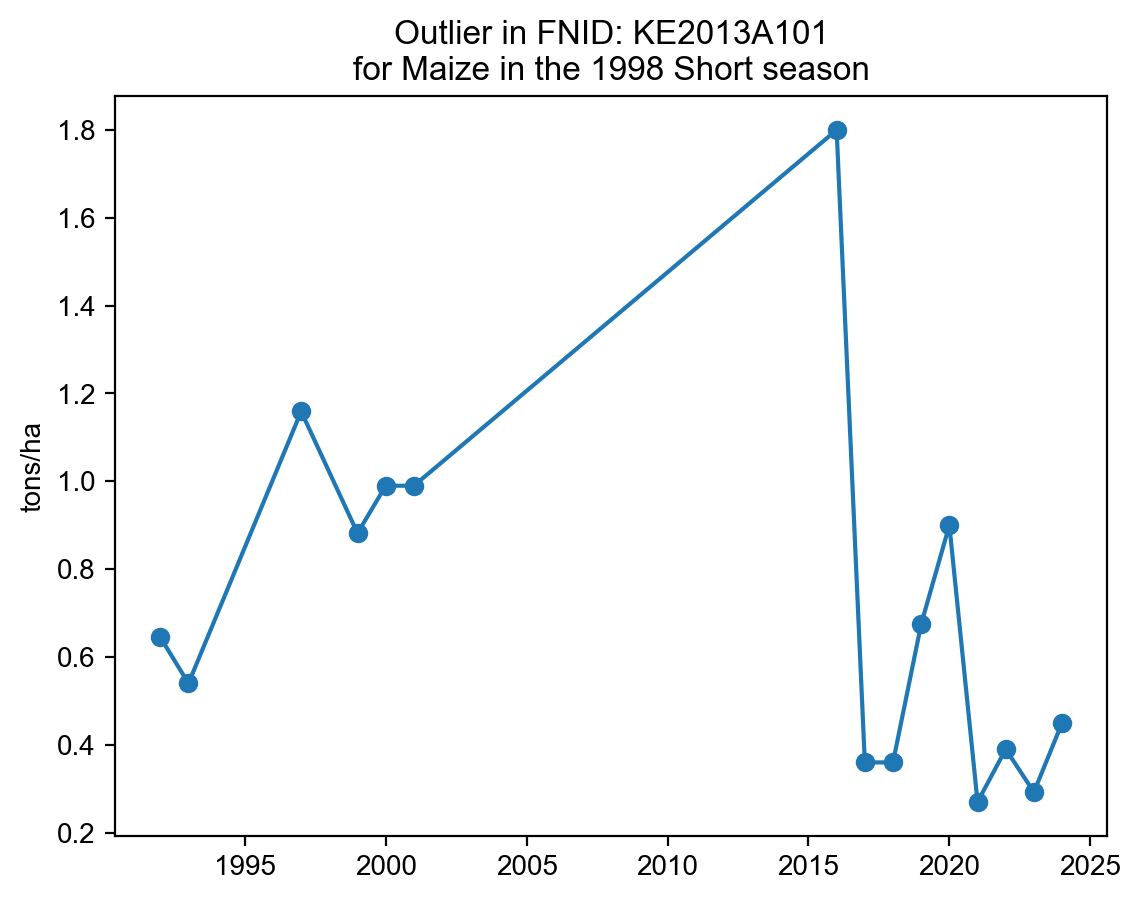

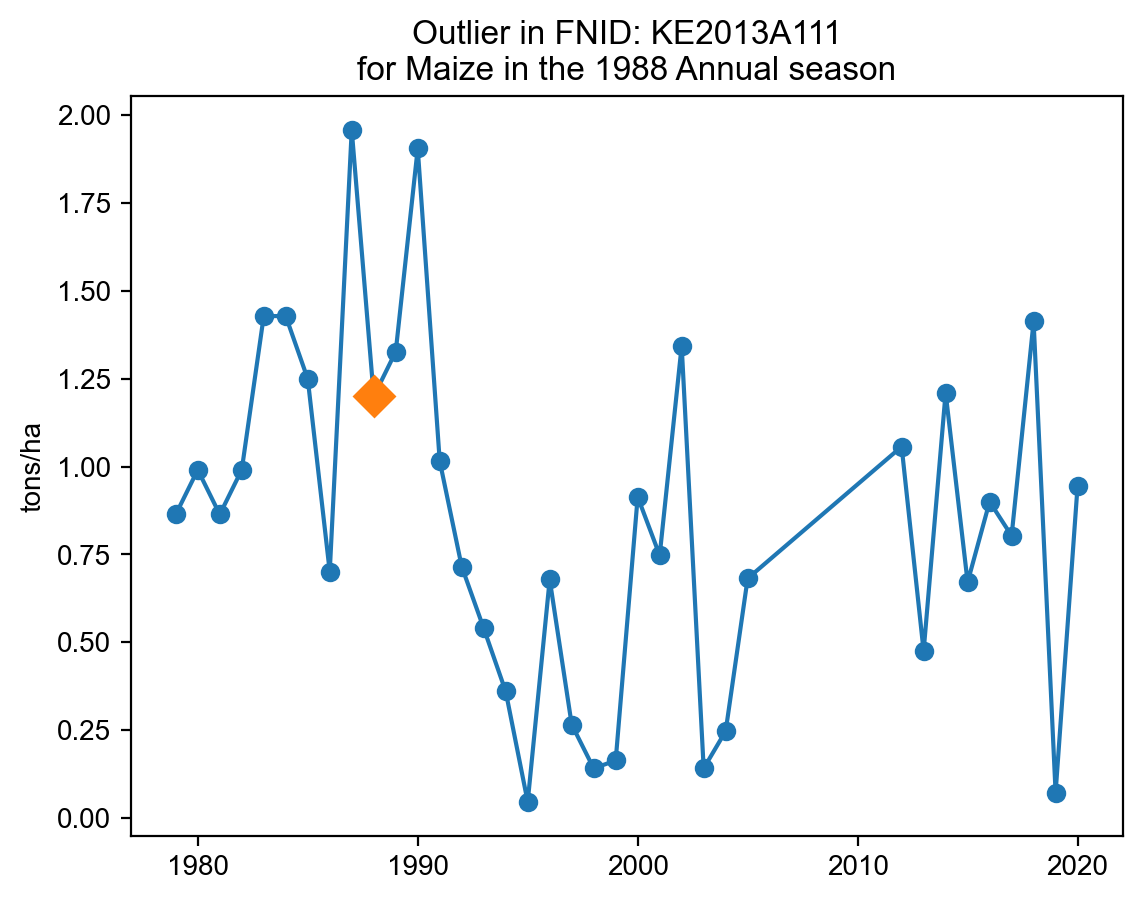

In [8]:
from matplotlib import pyplot as plt

#define a QC flag field
# 0 = no flag
# 1 = outlier
stack['QC_flag'] = 0


outliers = [
    ['KE2013A101','Maize','Short',1998],
    ['KE2013A111','Maize','Annual',1988]
]
stack=stack.sort_values(by='harvest_year')

#first plot, then flag the values (yield, production and harvested area)
for iou in outliers:
    plt.figure()
    plt.plot(stack[(stack.fnid==iou[0])&(stack['product']==iou[1])&(stack.season_name==iou[2])&(stack.indicator=='yield')].harvest_year.values,
            stack[(stack.fnid==iou[0])&(stack['product']==iou[1])&(stack.season_name==iou[2])&(stack.indicator=='yield')].value.values,'-o')
    plt.plot(stack[(stack.fnid==iou[0])&(stack['product']==iou[1])&(stack.season_name==iou[2])&(stack.indicator=='yield')&(stack.harvest_year==iou[3])].harvest_year.values,
            stack[(stack.fnid==iou[0])&(stack['product']==iou[1])&(stack.season_name==iou[2])&(stack.indicator=='yield')&(stack.harvest_year==iou[3])].value.values,'D',markersize=10)
    plt.title('Outlier in FNID: '+iou[0]+'\nfor '+iou[1]+' in the '+str(iou[3])+' '+iou[2]+' season')
    plt.ylabel('tons/ha')
    stack.loc[((stack.fnid==iou[0])&(stack['product']==iou[1])&(stack.season_name==iou[2])&(stack.harvest_year==iou[3])),'QC_flag']=1  

In [9]:
# Save data
fn_out = '../data/crop/adm_crop_production_KE.csv'
stack.to_csv(fn_out); print(f'{fn_out} is saved.')
save_npz('../data/crop/adm_crop_production_KE_ratio.npz', link_ratio)

../data/crop/adm_crop_production_KE.csv is saved.
../data/crop/adm_crop_production_KE_ratio.npz is saved.


# Visualization of production data

/Users/dlee/harveststat-africa/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


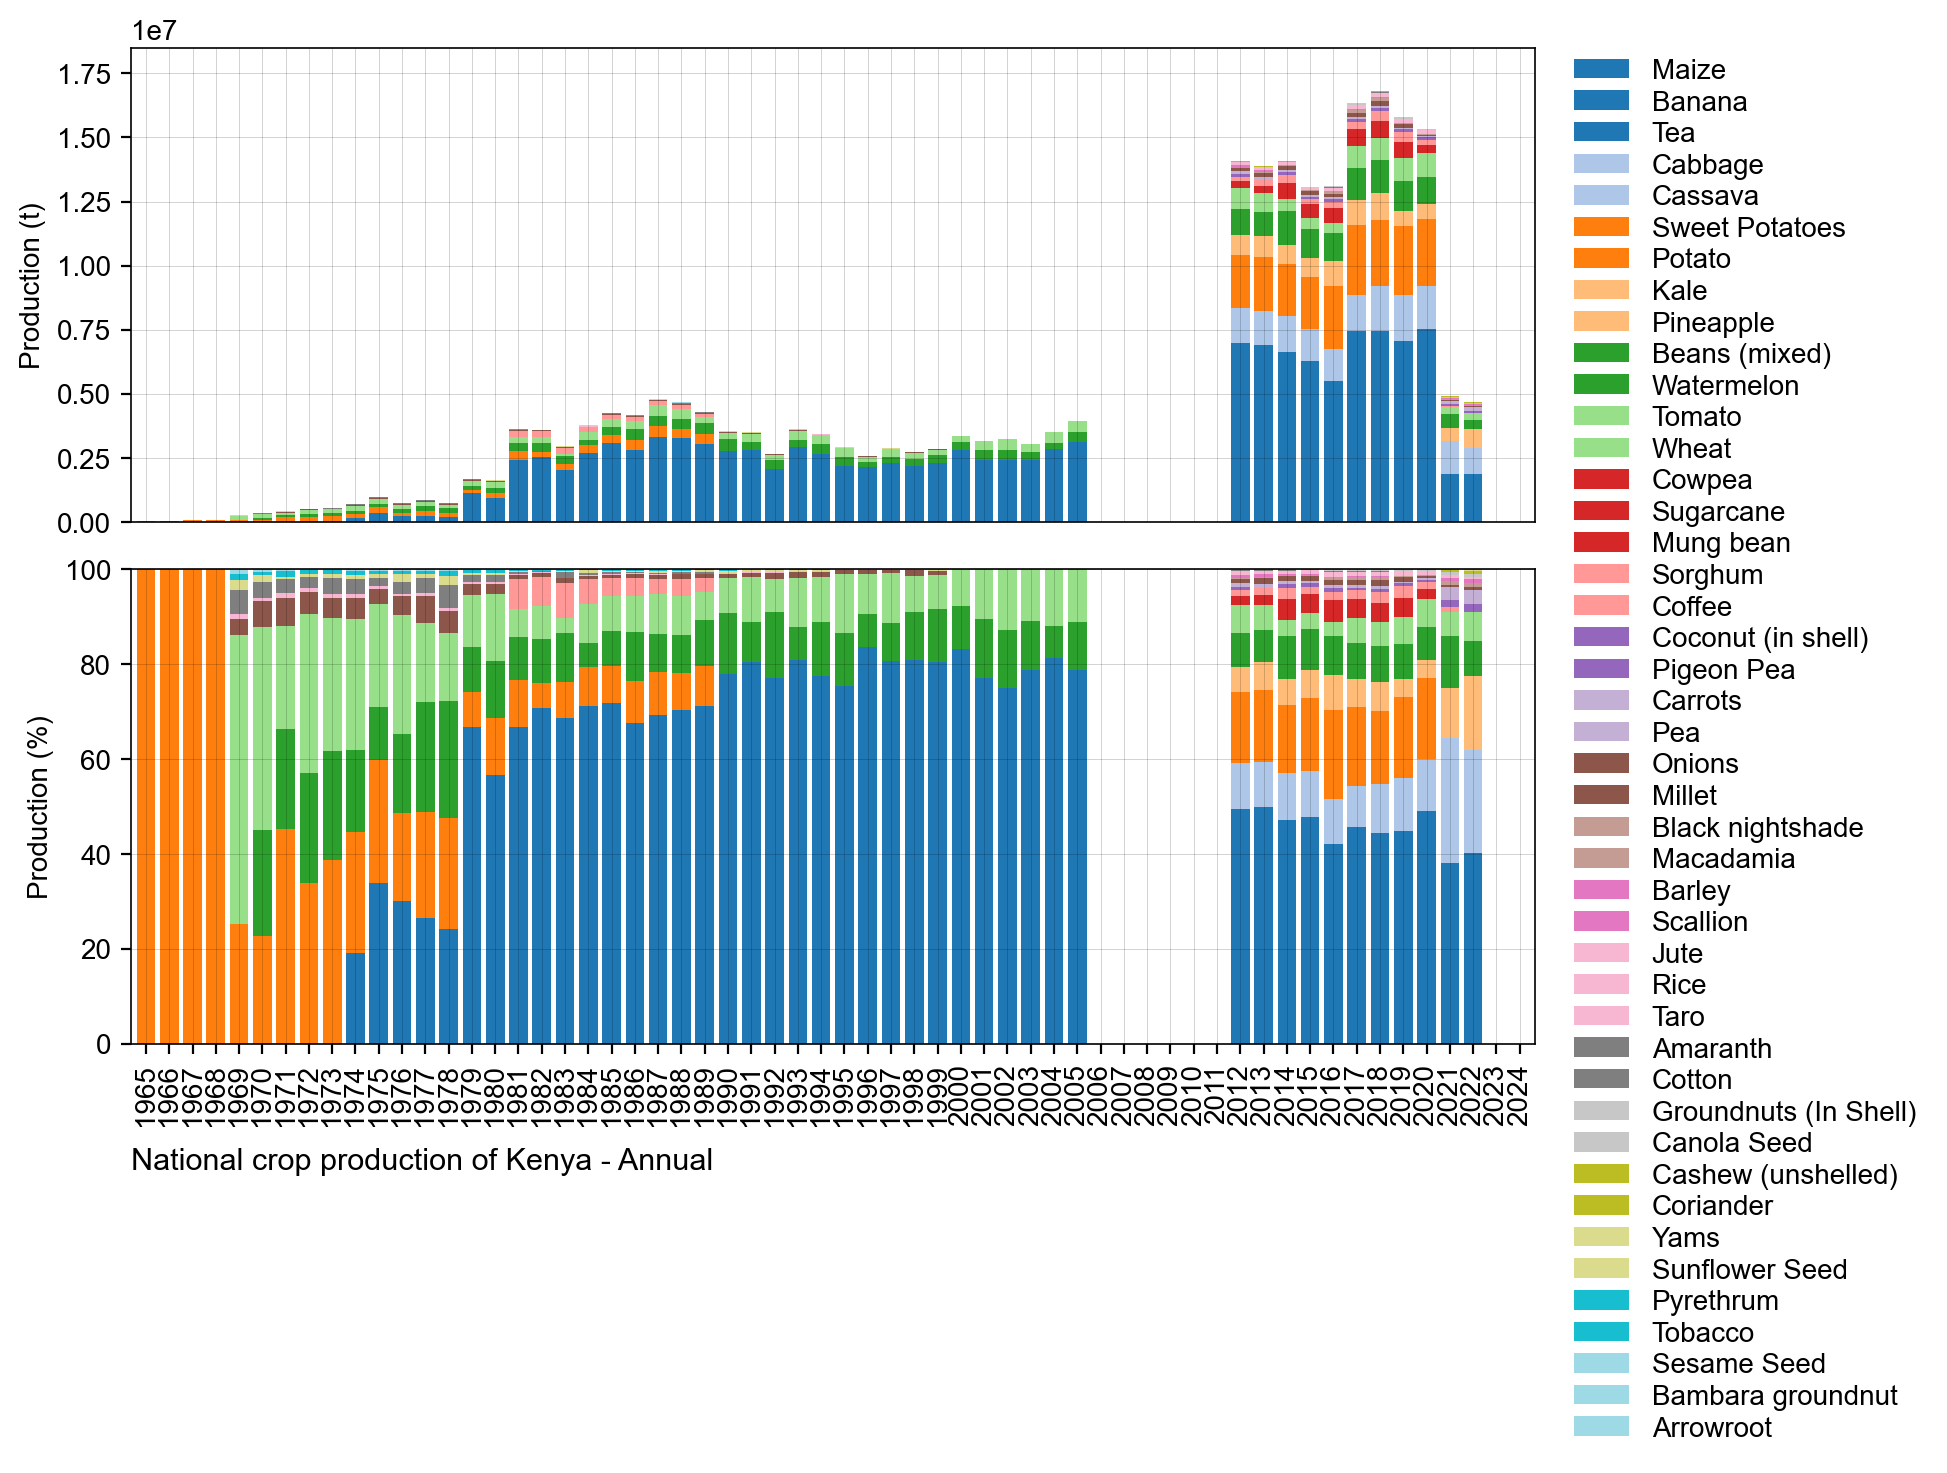

../figures/KE_bar_natgrainprod_Annual.png is saved.


/Users/dlee/harveststat-africa/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


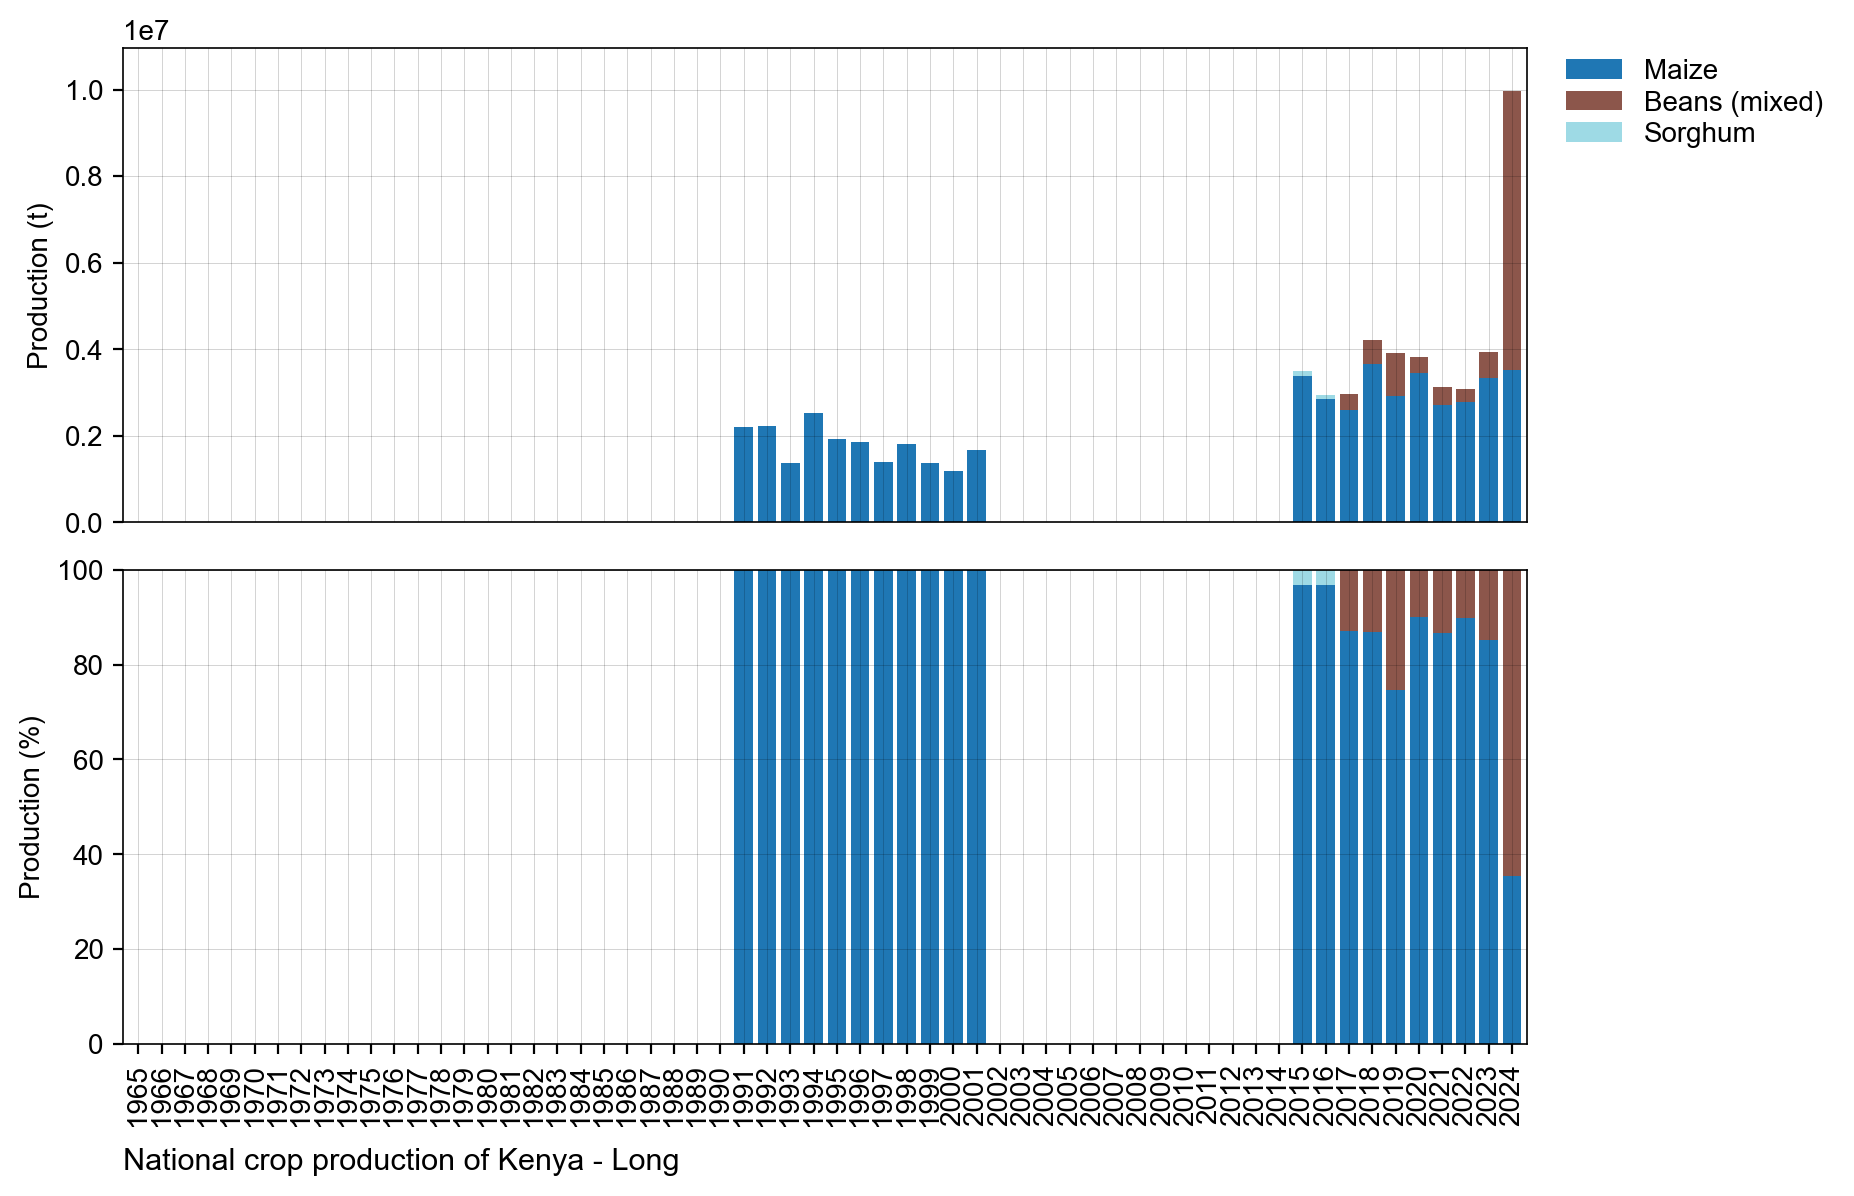

../figures/KE_bar_natgrainprod_Long.png is saved.


/Users/dlee/harveststat-africa/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


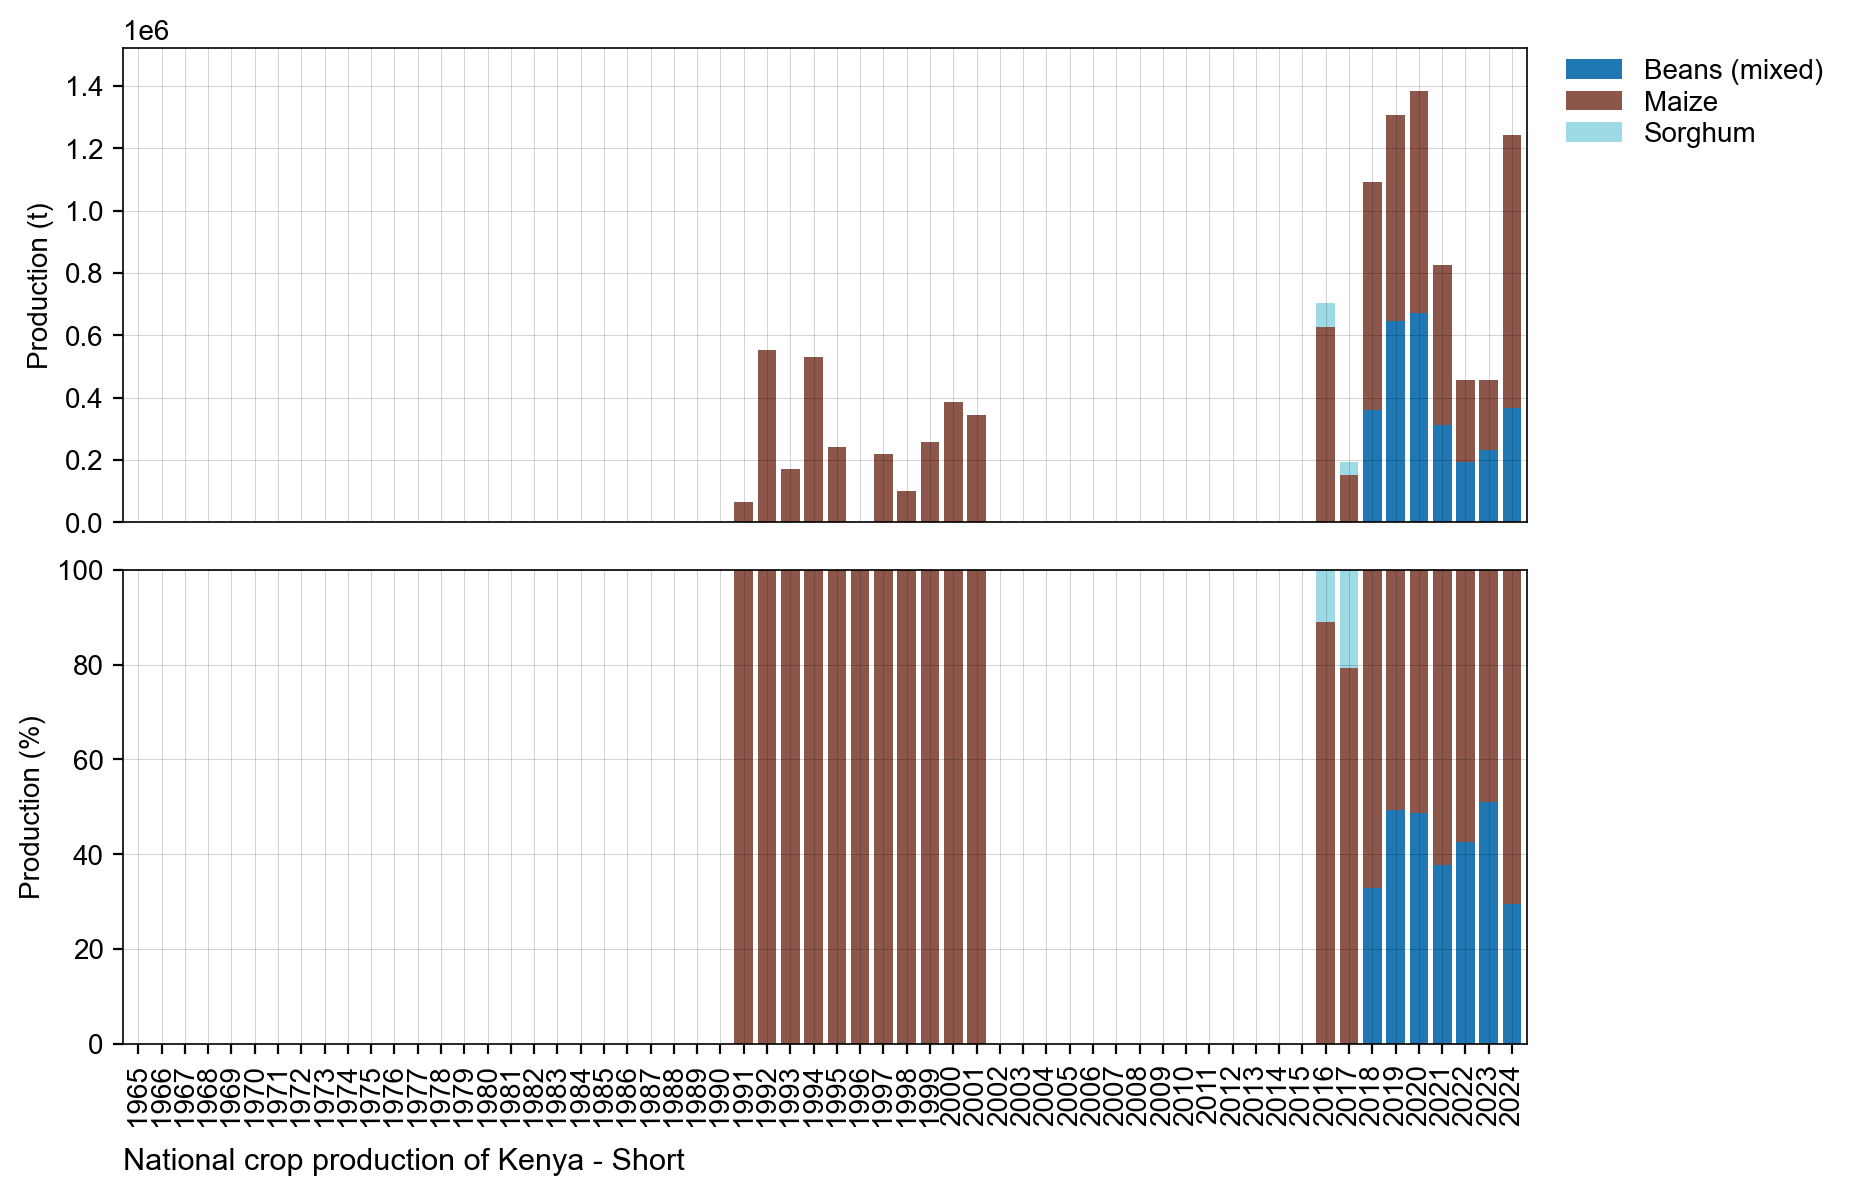

../figures/KE_bar_natgrainprod_Short.png is saved.


In [10]:
# Bar chart of national crop production
country_iso, country_name = 'KE', 'Kenya'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df = df[df['QC_flag'] == 0] # remove outliers
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
for season_name in ['Annual','Long','Short']:
    footnote = 'National crop production of %s - %s' % (country_name, season_name)
    fn_save = '../figures/%s_bar_natgrainprod_%s.png' % (country_iso, season_name)
    sub = df[df['season_name'] == season_name]
    PlotBarProduction(sub, year, footnote, fn_save)

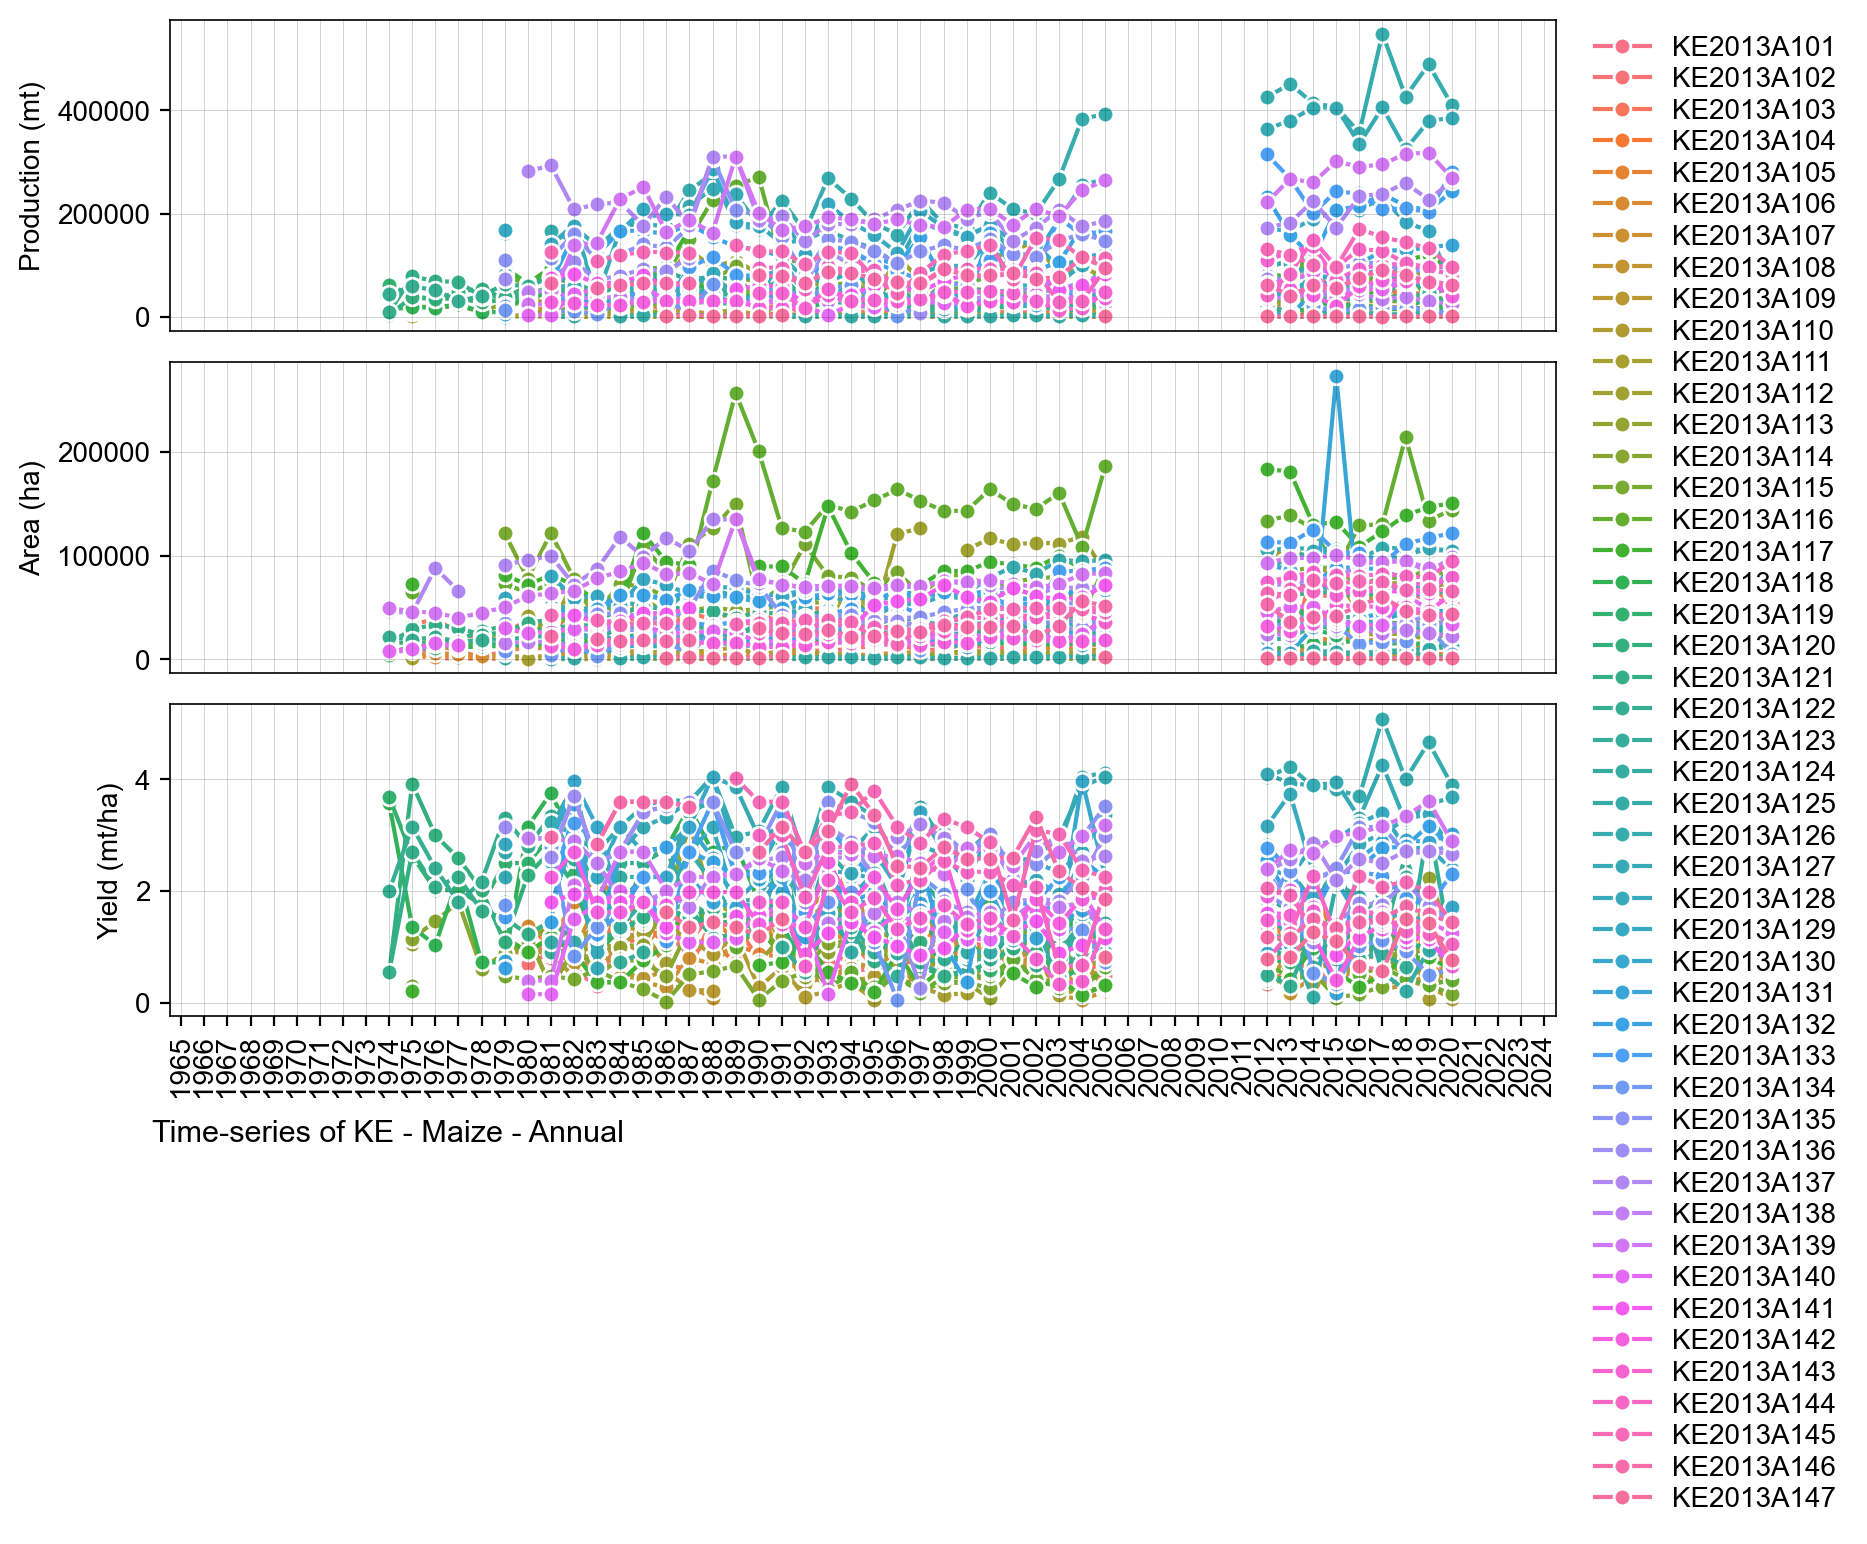

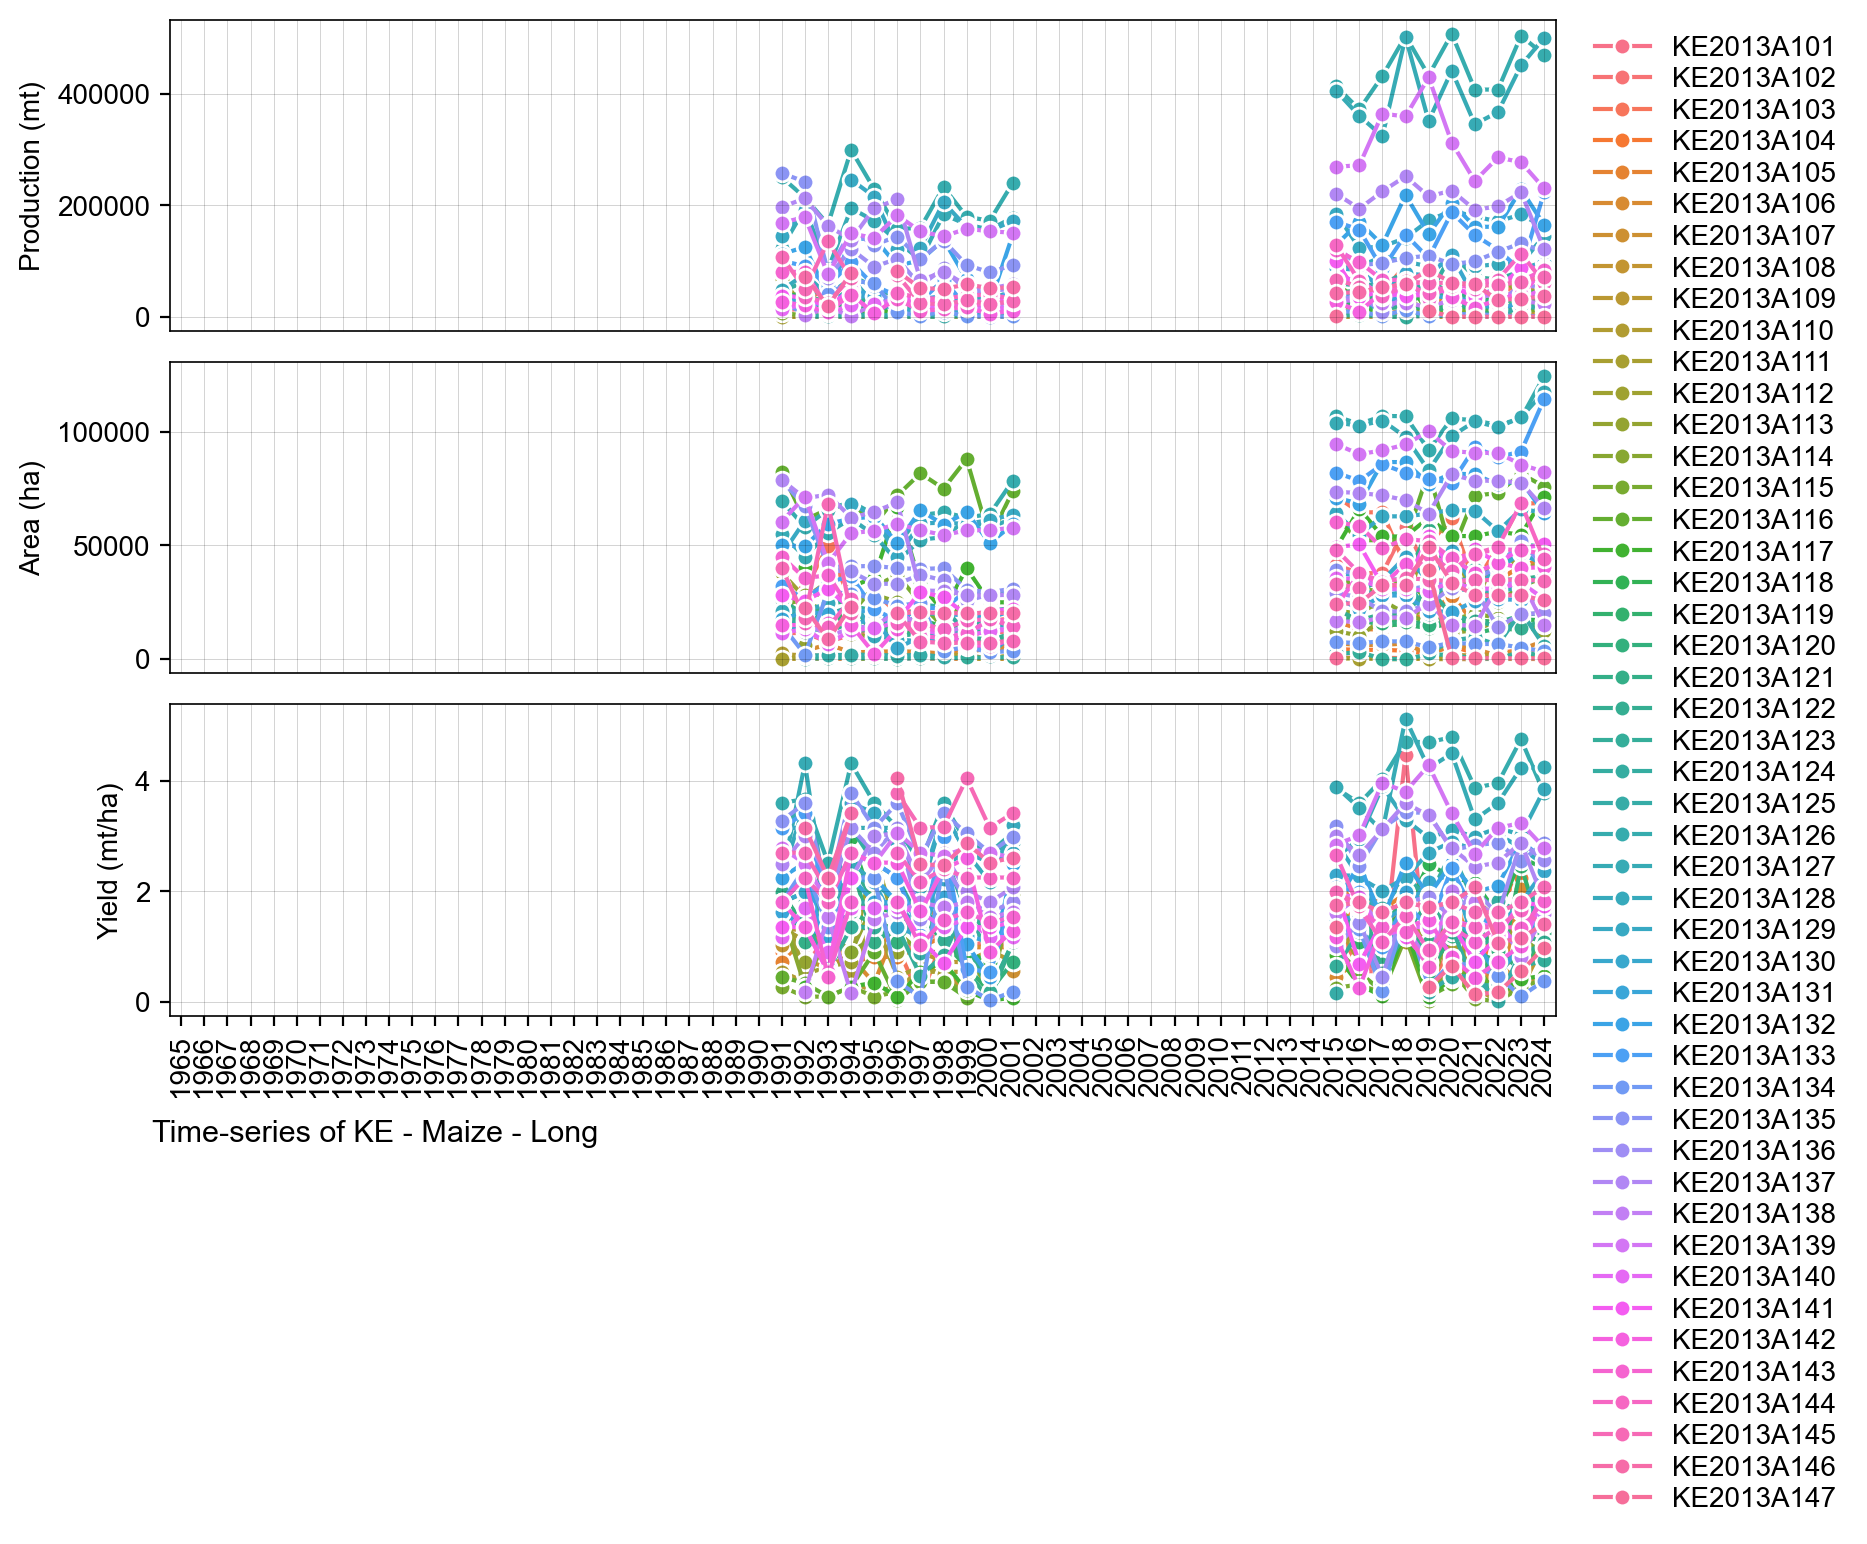

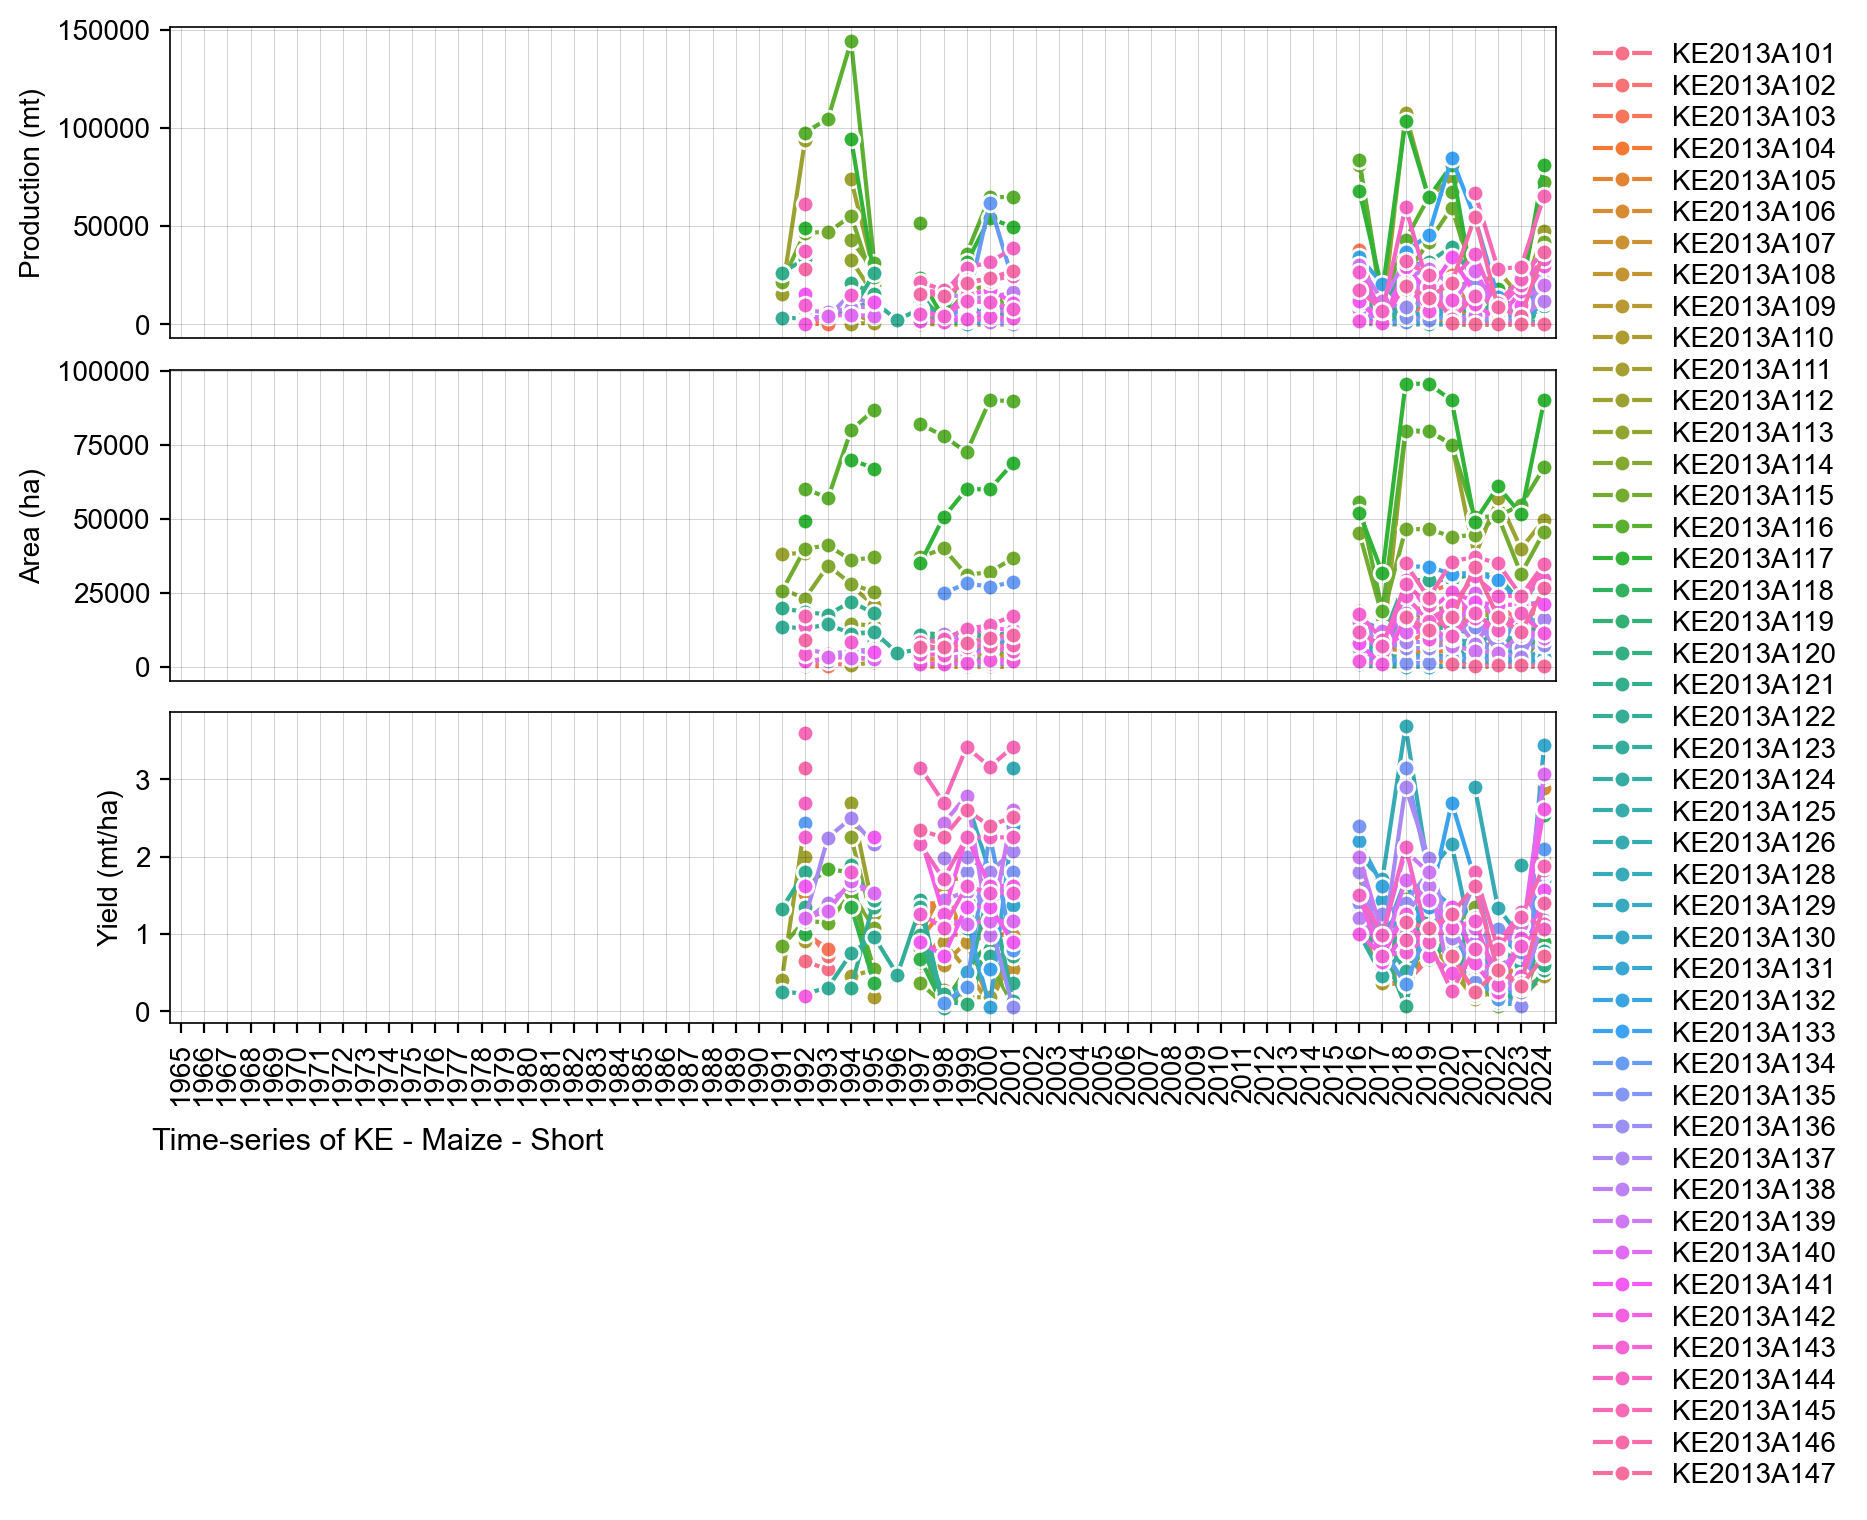

In [11]:
# Lineplot of Production-Area-Yield time-series
country_iso, country_name = 'KE', 'Kenya'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df = df[df['QC_flag'] == 0] # remove outliers
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
product_season = [
    ['Maize','Annual'],
    ['Maize','Long'],
    ['Maize','Short']
]
for product_name, season_name in product_season:
    footnote = 'Time-series of %s - %s - %s' % (country_iso, product_name, season_name)
    fn_save = '../figures/%s_line_pay_%s_%s.png' % (country_iso, product_name, season_name)
    sub = df[(df['product'] == product_name) & (df['season_name'] == season_name)]
    PlotLinePAY(sub, year, footnote)